<a id="Jupyter"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#to perform K-means Clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# To perform Hierarchy Clusters
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format
# Whether to print out the full DataFrame repr for wide DataFrames across multiple lines, max_columns is still respected, but the output will wrap-around across multiple “pages” if it’s width exceeds display.width. [default: True] 

<a id="data"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            1. Problem Statement - Clustering: Digital Ads Data
            </span>   
        </font>    
</h2>

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File.

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.1 Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.1 (A) Importing the Data Dictionary of Provided Dataset
            </span>   
        </font>    
</h3>

In [4]:
df_ads_dict = pd.read_excel('ClusteringCleanAdsData.xlsx',sheet_name='Data Dictionary',header=1)
df_ads_dict

,Column Name,Column Description
0,Timestamp,The Timestamp of the particular Advertisement.
1,InventoryType,The Inventory Type of the particular Advertisement. Format 1 to 7. This is a Categorical Variable.
2,Ad - Length,The Length Dimension of the particular Adverstisement.
3,Ad- Width,The Width Dimension of the particular Advertisement.
4,Ad Size,The Overall Size of the particular Advertisement. Length*Width.
5,Ad Type,The type of the particular Advertisement. This is a Categorical Variable.
6,Platform,"The platform in which the particular Advertisement is displayed. Web, Video or App. This is a Categorical Variable."
7,Device Type,The type of the device which supports the partciular Advertisement. This is a Categorical Variable.
8,Format,The Format in which the Advertisement is displayed. This is a Categorical Variable.
9,Available_Impressions,How often the particular Advertisement is shown. An impression is counted each time an Advertisement is shown on a search result page or other site on a Network.


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.1 (B) Importing the Dataset - CleanAdsData
            </span>   
        </font>    
</h3>

In [5]:
df_ads_data = pd.read_excel('ClusteringCleanAdsData.xlsx',sheet_name='Data')

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.2 Displaying the first 5 and last 5 records
            </span>   
        </font>    
</h3>

In [6]:
df_ads_data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.00,0.00,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.00,0.00,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.00,0.00,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.00,0.00,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.00,0.00,0.00,0.00


In [7]:
df_ads_data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.05,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.03,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.03,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.05,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.06,NaN,NaN,NaN


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.3  Checking the shape, size and information of data using dataset
            </span>   
        </font>    
</h3>

In [8]:
# Database dimension
print("Dataset dimension - usage_data                          :",df_ads_data.shape)

#Database size
print("Dataset size - usage_data                               :",df_ads_data.size)

Dataset dimension - usage_data                          : (23066, 19)
Dataset size - usage_data                               : 438254


In [9]:
df_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.4  Data Summary using describe
            </span>   
        </font>    
</h3>

In [10]:
df_ads_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.00,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.00,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.00,96674.47,61538.33,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.00,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Matched_Queries,23066.00,1295099.14,2512969.86,1.00,18282.50,258087.50,1180700.00,14702025.00
Impressions,23066.00,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.00,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.00,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Fee,23066.00,0.34,0.03,0.21,0.33,0.35,0.35,0.35
Revenue,23066.00,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.5  Missing Values in Ads Dataset
            </span>   
        </font>    
</h3>

In [11]:
df_ads_data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [12]:
missing_values=pd.DataFrame(df_ads_data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df_ads_data.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,Timestamp,0,0.00
1,InventoryType,0,0.00
2,Ad - Length,0,0.00
3,Ad- Width,0,0.00
4,Ad Size,0,0.00
5,Ad Type,0,0.00
6,Platform,0,0.00
7,Device Type,0,0.00
8,Format,0,0.00
9,Available_Impressions,0,0.00


<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.6  Duplicate Values in Ads Dataset
            </span>   
        </font>    
</h3>

In [13]:
df_ads_data.duplicated().sum()

0

In [14]:
df_ads_data.nunique()

Timestamp                 2018
InventoryType                7
Ad - Length                  6
Ad- Width                    5
Ad Size                      7
Ad Type                     14
Platform                     3
Device Type                  2
Format                       2
Available_Impressions    21560
Matched_Queries          20919
Impressions              20405
Clicks                   12752
Spend                    20467
Fee                          7
Revenue                  20578
CTR                       2066
CPM                       2084
CPC                        194
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Data has been loaded to pandas from ClusteringCleanAdsData.xlsx file</li>
            <li>Records loaded in the dataframe has been shown using pandas heads and tails methods</li>
            <li>The shape of dataset is - 23066 x 19. It contains 23066 rows and 19 columns</li>
            <li>The size of the dataset is - 438254 </li>
            <li> Columns - InventoryType, Ad Type, Platform, Device Type and Format are categorical variables with dtype as object. These fields have to be updated to numeric values so that the variables can be used for Clustering </li>
            <li>Column - Timestamp is object dtype. It can be converted to Datetime dtype. It is not important for clustering. So, we will drop this field</li>
            <li>Column - CTR, CPM and CPC - have missing values. About 20% of the data is missing and it needs to be updated based on the formula given</li>
            <li>There is no duplicated values in the dataset</li>
                <li>From the data summary, we could make following observation</li>
            <ul>
                <li>There seems to be too much difference between mean and median of some variables, it indicates the presence of significant outliers</li>
                <li>For Available_Impressions - mean value is - 2432043.67 and median value is - 483771.00.</li>
                <li>Similarly, for Matched_Queries - mean value is - 1295099.14 and median value is - 258087.50.</li>
                <li>Again, for Impressions - mean value is -1241519.52  abd median value is -225290.00.</li>
                <li>For each of the variables, there is significant difference between min and max values as well.</li>
                <li>All these statistical information hints that there is presence of outlier in the above mentioned variables.
            We will do boxplot to get further insights about outlier.</li>
            </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.2 Treat missing values in CPC, CTR and CPM using the formula given.
            </span>   
        </font>    
</h3>

In [15]:
def calculate_cpm():
    spend = df_ads_data.Spend
    impression = df_ads_data.Impressions
    cpm = (spend/impression)*1000
    return cpm

def calculate_cpc():
    spend = df_ads_data.Spend
    click = df_ads_data.Clicks
    cpc = (spend/click)
    return cpc

def calculate_ctr():
    impression = df_ads_data.Impressions
    click = df_ads_data.Clicks
    ctr = click/impression*100
    return ctr

In [16]:
df_ads_data['CPM']=df_ads_data[['CPM']].apply(lambda x: calculate_cpm())
df_ads_data['CPC']=df_ads_data[['CPC']].apply(lambda x: calculate_cpc())
df_ads_data['CTR']=df_ads_data[['CTR']].apply(lambda x: calculate_ctr())

In [17]:
df_ads_data.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.00,0.31,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.00,0.35,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.00,0.28,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.00,0.20,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.00,0.41,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.00,3.12,0.00,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.00,0.50,0.05,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.00,0.51,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.00,0.74,0.00,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.00,0.32,0.00,0.00


In [18]:
df_ads_data.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.07,50.00,50.00,0.10
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.05,50.00,35.00,0.07
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.05,100.00,80.00,0.08
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.05,50.00,35.00,0.07
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.09,25.00,35.00,0.14
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.05,100.00,70.00,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.03,50.00,20.00,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.03,100.00,50.00,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.05,100.00,70.00,0.07
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.06,50.00,45.00,0.09


In [19]:
missing_values=pd.DataFrame(df_ads_data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df_ads_data.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,Timestamp,0,0.00
1,InventoryType,0,0.00
2,Ad - Length,0,0.00
3,Ad- Width,0,0.00
4,Ad Size,0,0.00
5,Ad Type,0,0.00
6,Platform,0,0.00
7,Device Type,0,0.00
8,Format,0,0.00
9,Available_Impressions,0,0.00


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <br> Created three functions to calculate CPM, CTR and CPC based on the formula provided
        <ul>
            <font size="3" color = DarkBlue >
            <li>Function calculate_cpm to calculate CPM values</li>
            <li>Function calculate_cpc to calculate CPC values</li>
            <li>Function calculate_ctr to calculate CTR values</li>
        </ul>
        <br> Applied above functions to update the missing values in variables CPM, CPC and CTR.
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.3 Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst)
            </span>   
        </font>    
</h3>

In [20]:
df_ads_data.select_dtypes(include=['float64','int64']).columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC'], dtype='object')

#### Evaluate Variables for outlier treatment
- InventoryType, Ad Type, Platform, Device Type and Format is categorical variable and therefore outlier treatment is not needed for such variables.  


- Ad - Length, Ad- Width, Ad Size, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM and CPC will be evaluated for outlier.                   



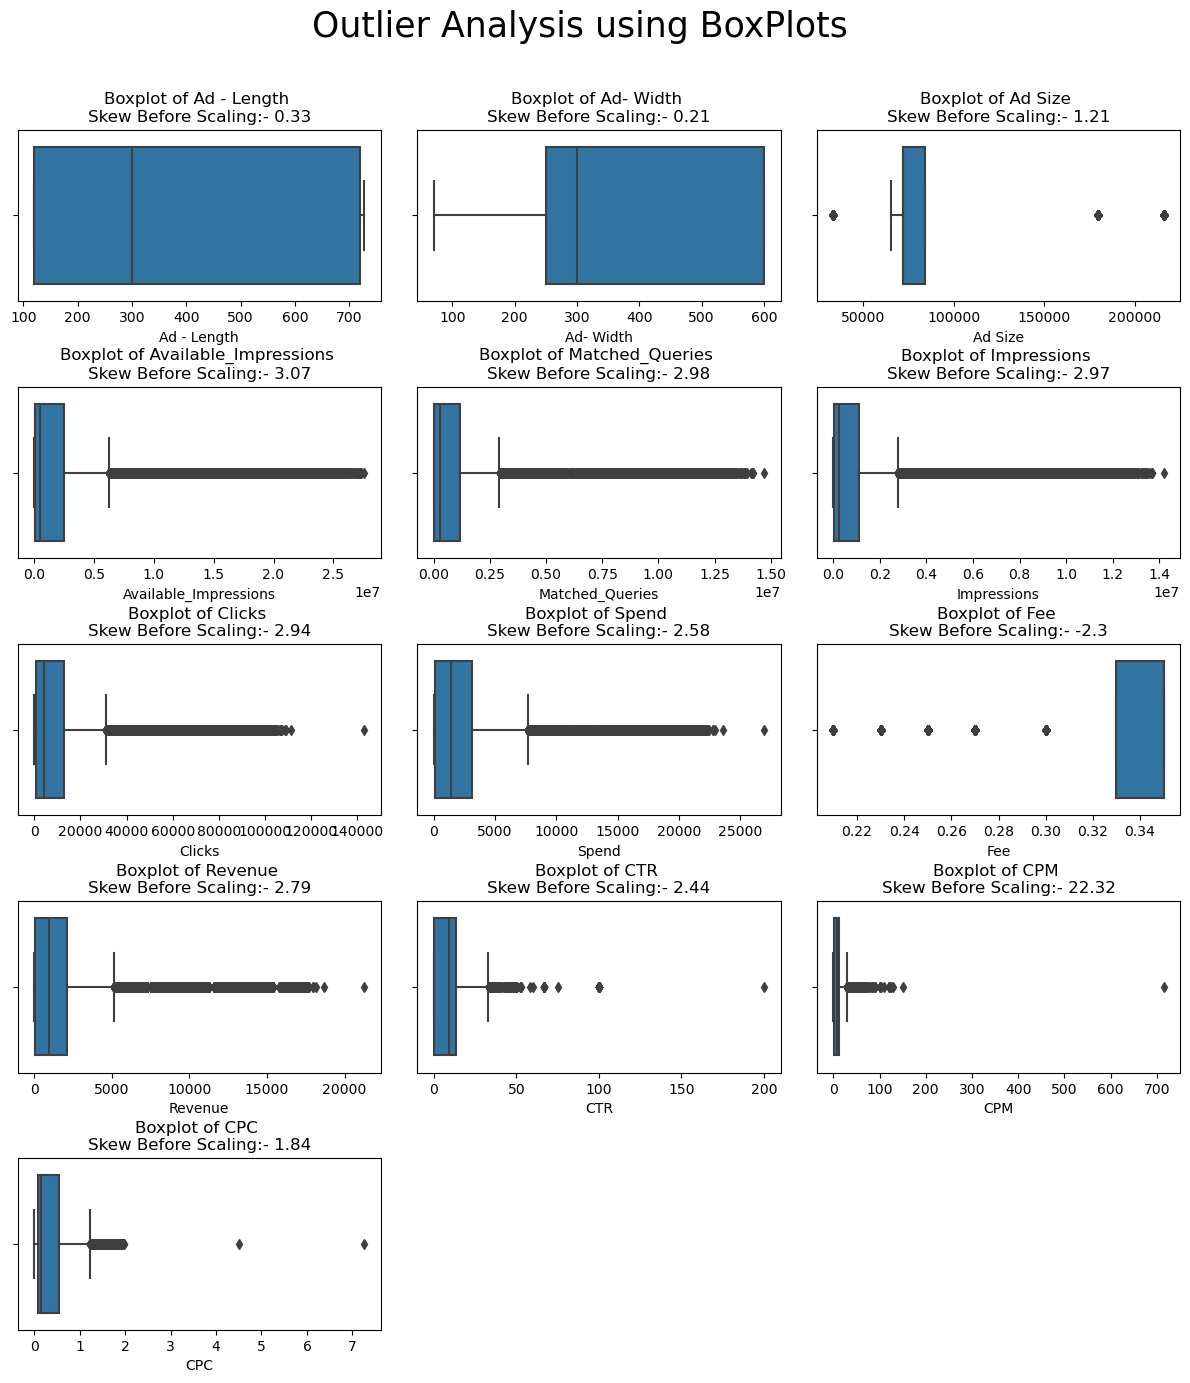

In [21]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
fig.tight_layout()

for i, col in enumerate(df_ads_data.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_ads_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_ads_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

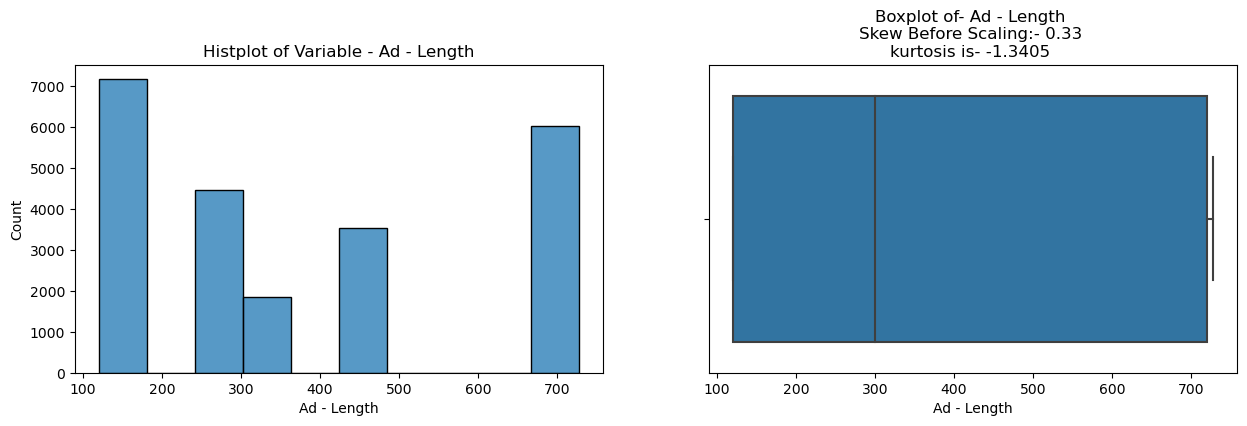

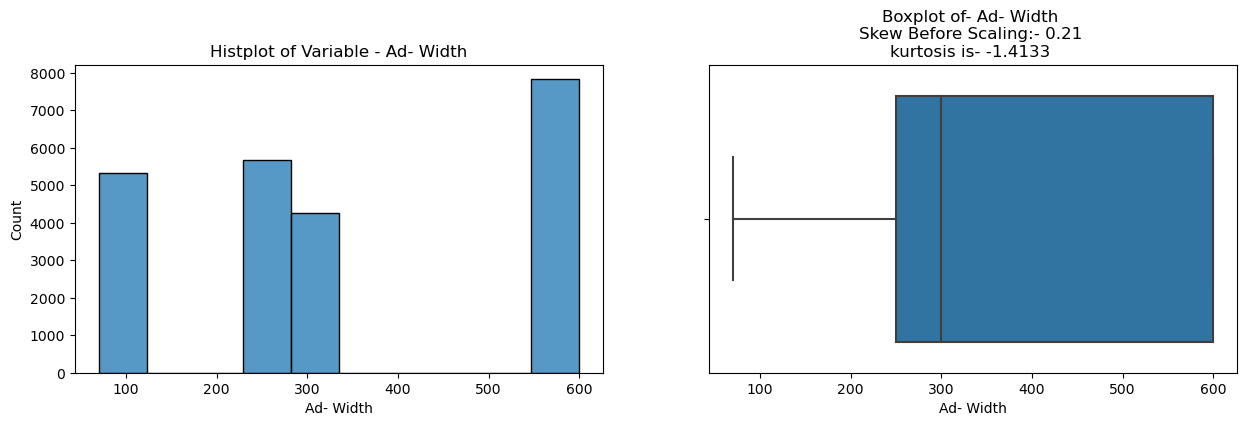

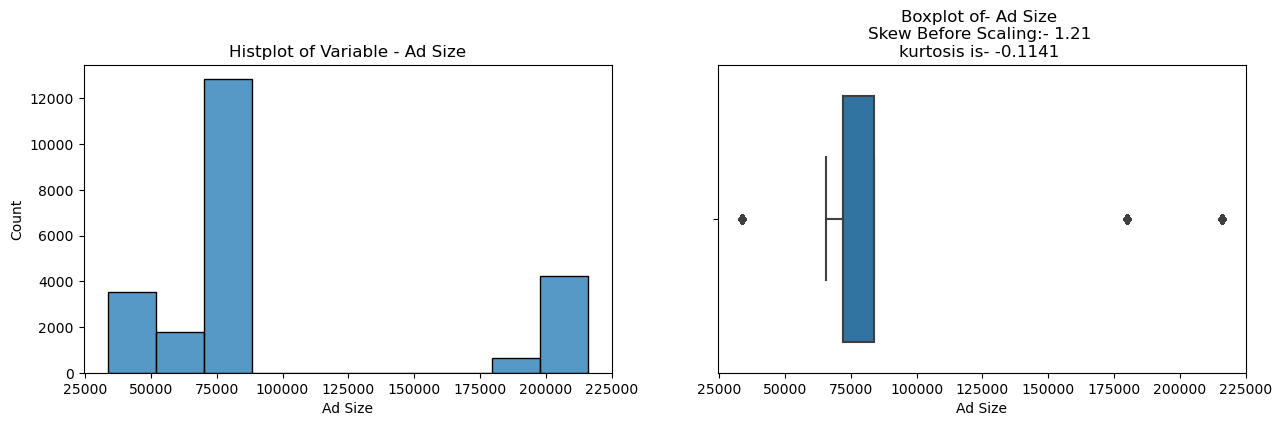

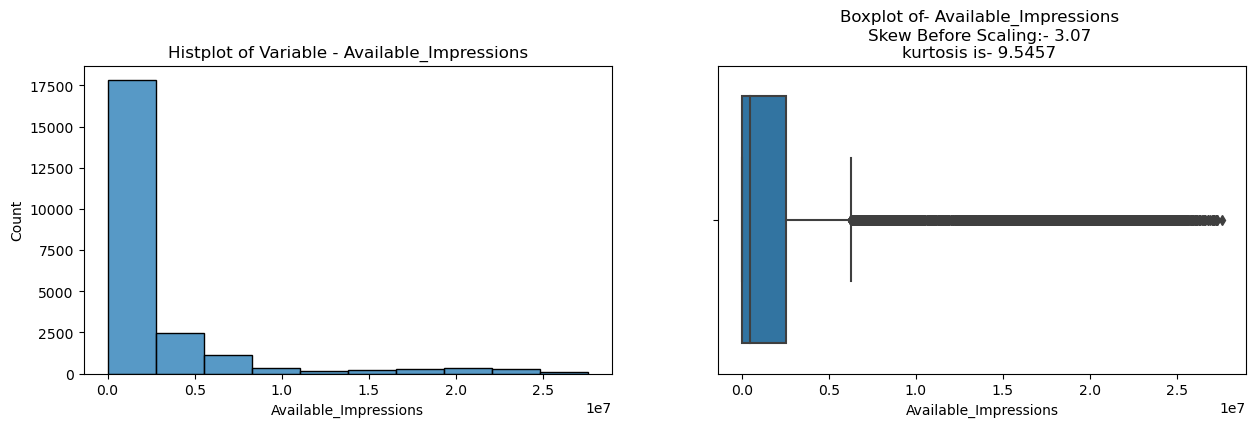

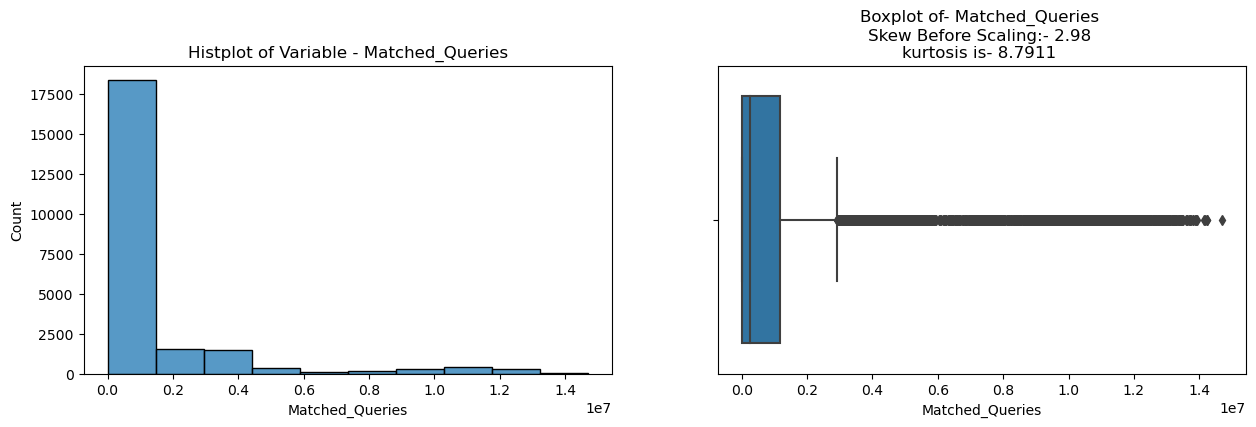

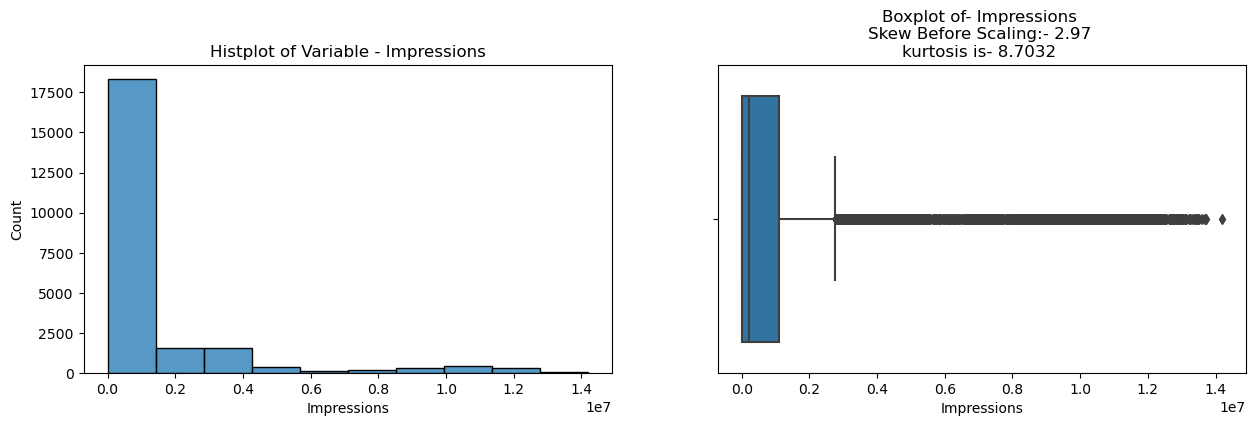

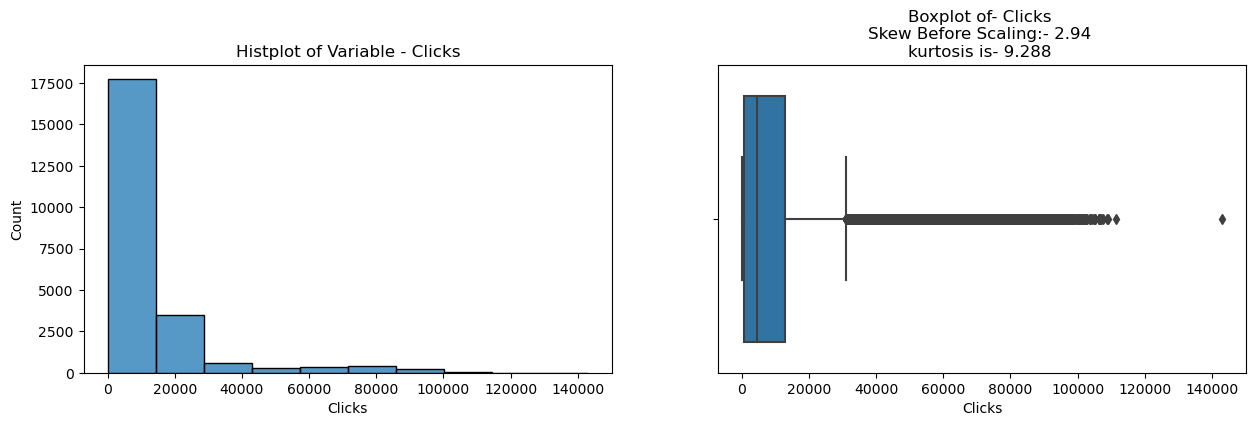

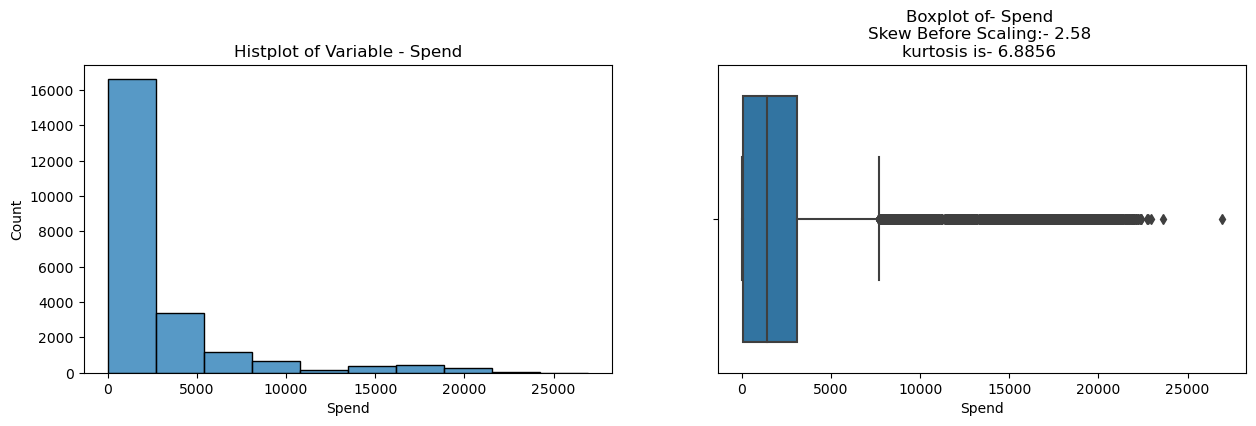

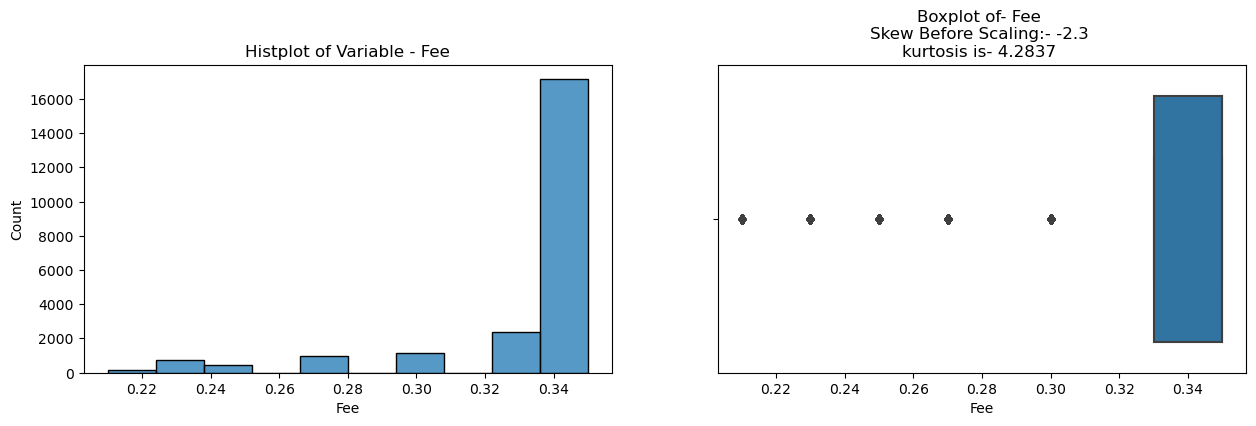

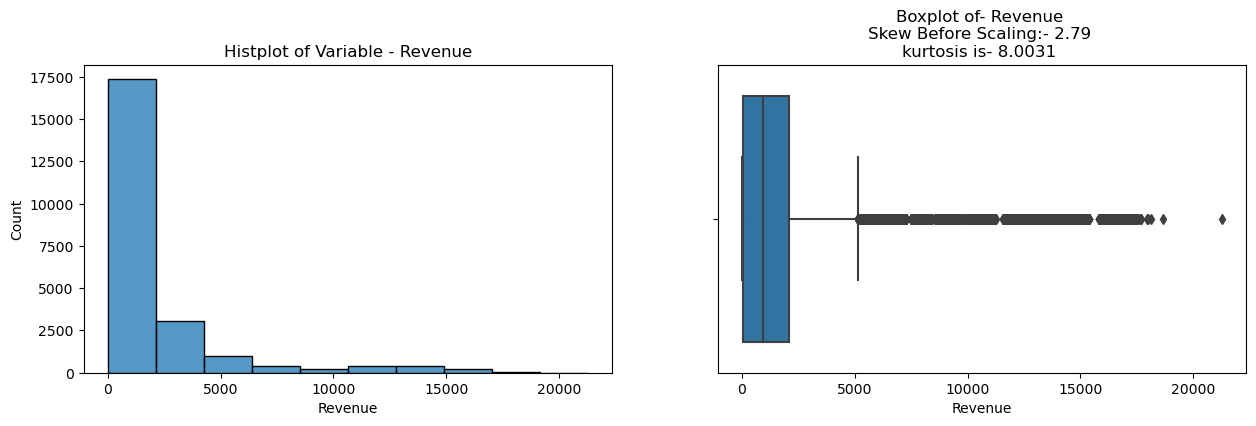

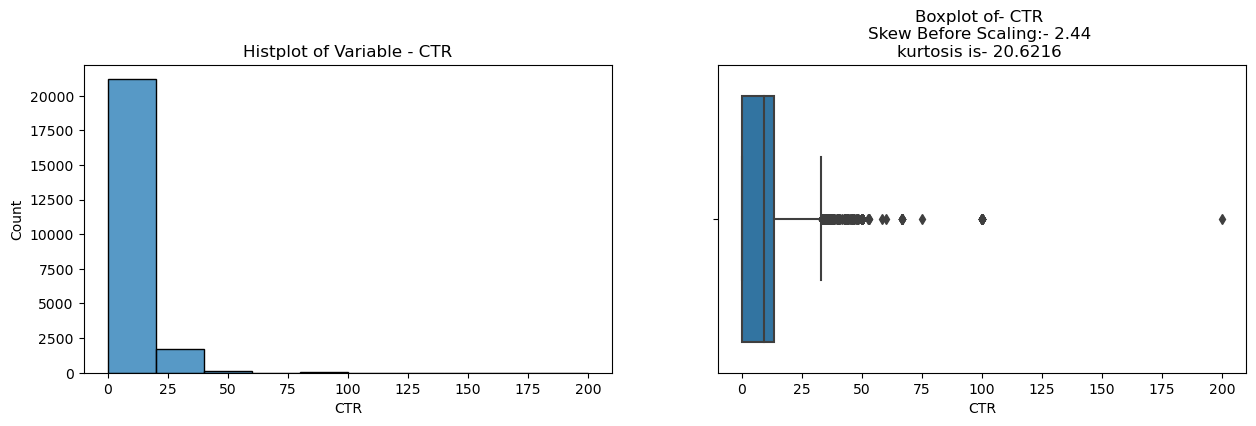

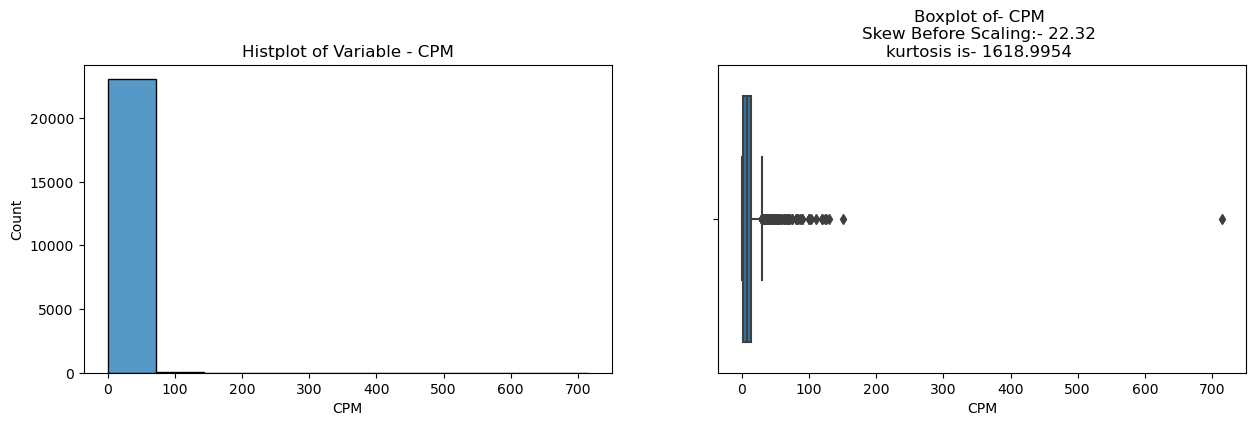

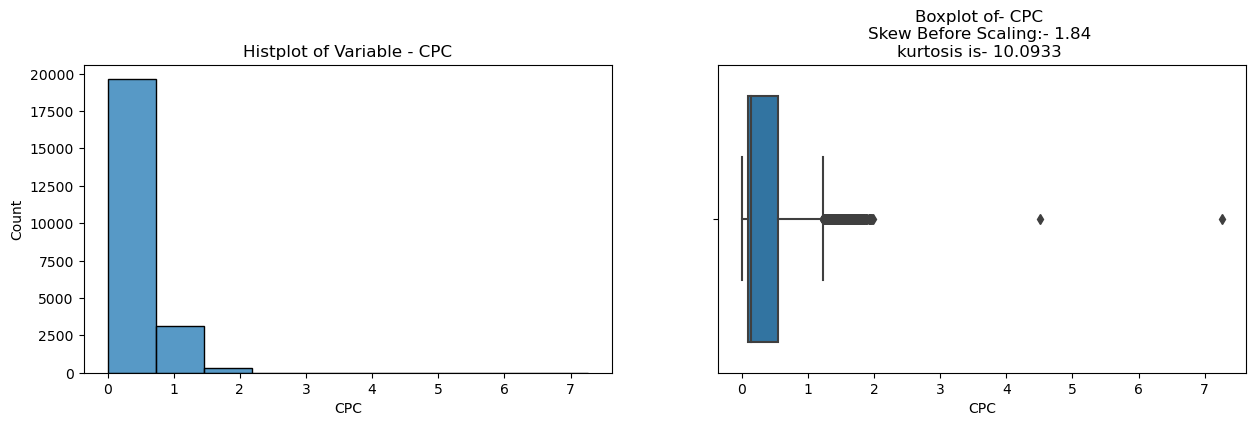

In [22]:
for col in df_ads_data.select_dtypes(include=['float64','int64']).columns:
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    sns.histplot(x=df_ads_data[col], bins=10, ax=ax1)
    ax1.title.set_text(f'Histplot of Variable - {col}')

    sns.boxplot(x=df_ads_data[col], ax = ax2)
    ax2.title.set_text(f'Boxplot of- {col} \nSkew Before Scaling:- {round(df_ads_data[col].skew(),2)} \nkurtosis is- {round(df_ads_data[col].kurtosis(),4)} ')
    plt.show()

In [23]:
def get_outlier_range(cname):
    sorted(cname)
    q1, q3 = cname.quantile([0.25,0.75])
    IQR = q3-q1
    llimit = q1-(1.5 * IQR)
    hlimit = q3+(1.5 * IQR)
    return llimit, hlimit 

In [24]:
clist = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM','CPC']
for col in clist:
    lval, hval = get_outlier_range(df_ads_data[col])
    df_ads_data[col] = np.where(df_ads_data[col] >hval, hval, df_ads_data[col])
    df_ads_data[col] = np.where(df_ads_data[col] <lval, lval, df_ads_data[col])

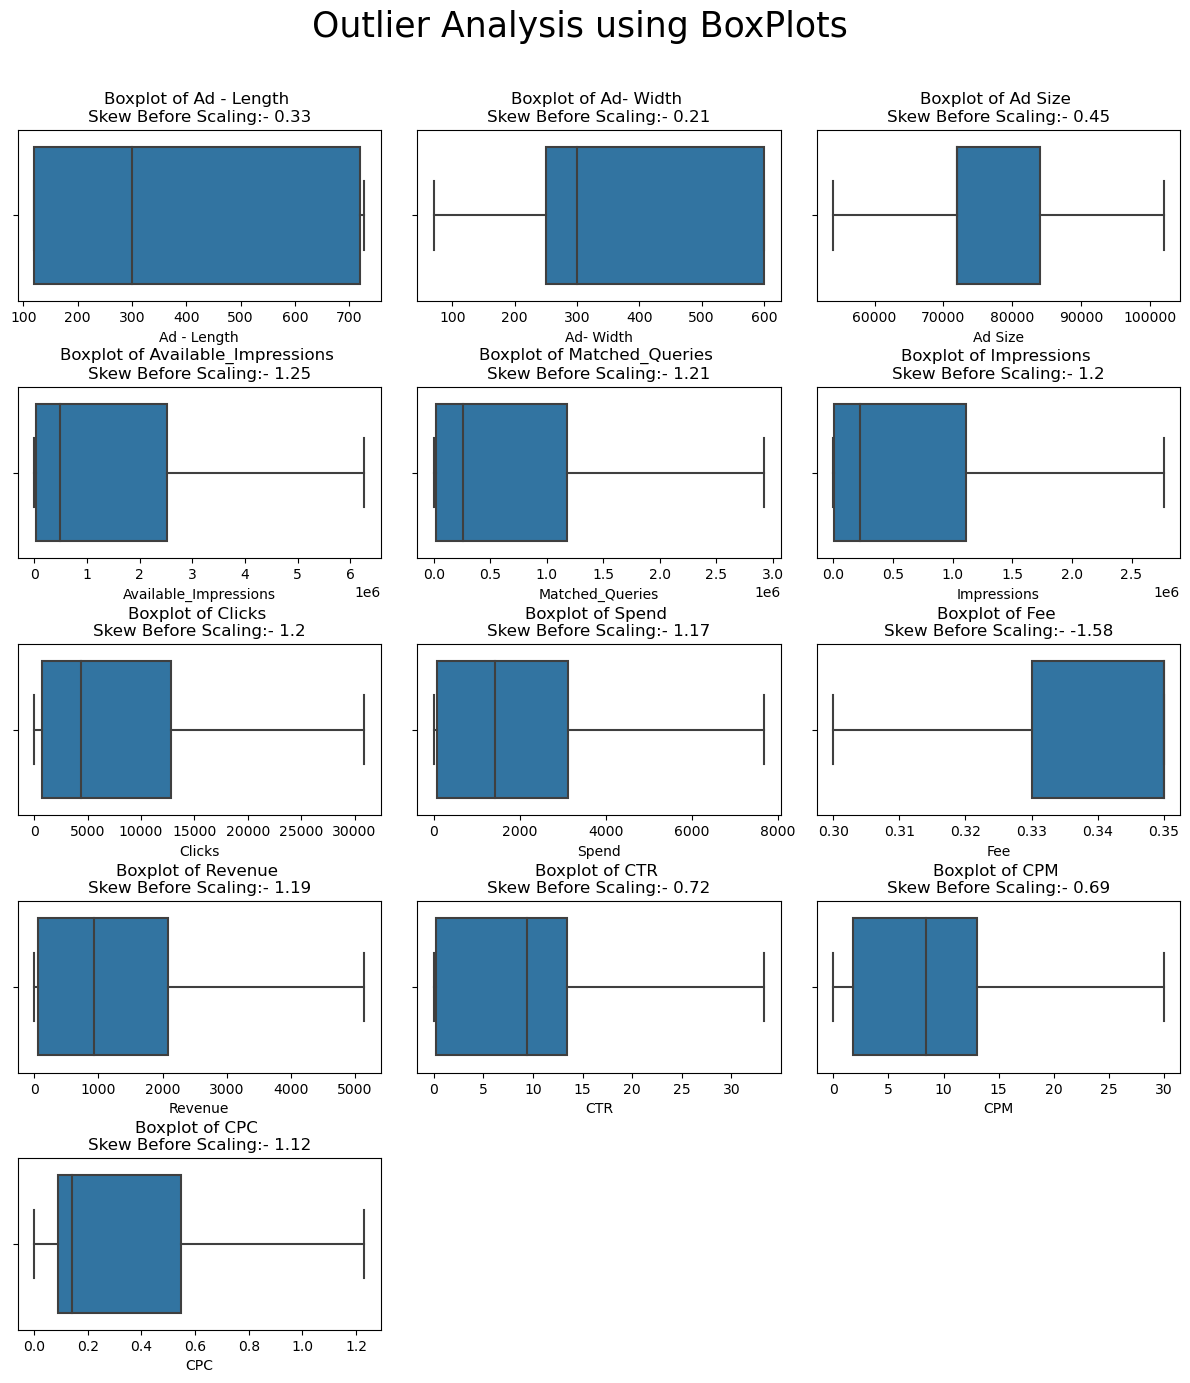

In [25]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, top=0.9, wspace= 0.1, bottom = 0.1)
fig.suptitle('Outlier Analysis using BoxPlots', fontsize=20)
fig.tight_layout()

for i, col in enumerate(df_ads_data.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(5,3,i+1)
    sns.boxplot(x = df_ads_data[col], ax = ax1)
    ax1.set_xlabel(col)
    ax1.title.set_text(f'Boxplot of {col} \nSkew Before Scaling:- {round(df_ads_data[col].skew(),2)}')
    
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25)
plt.show()

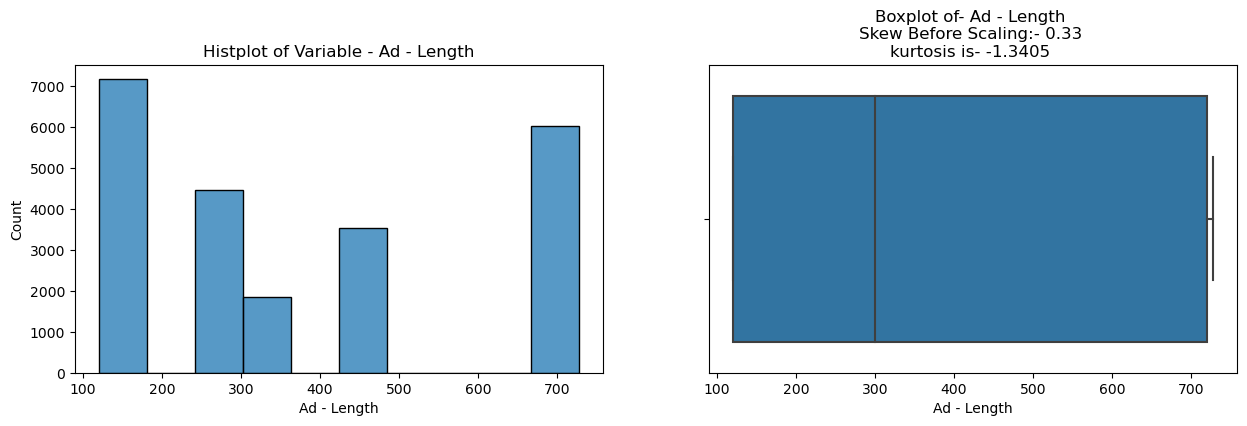

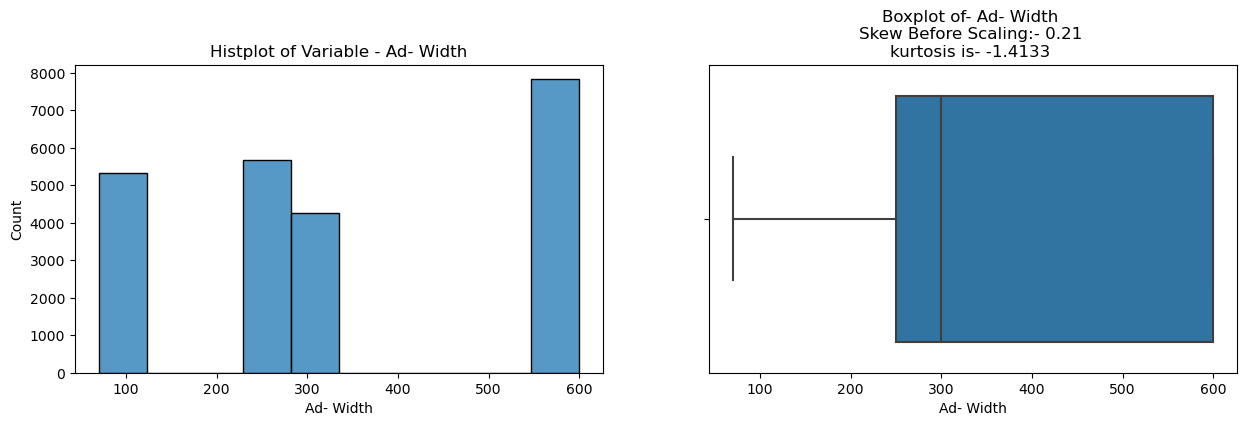

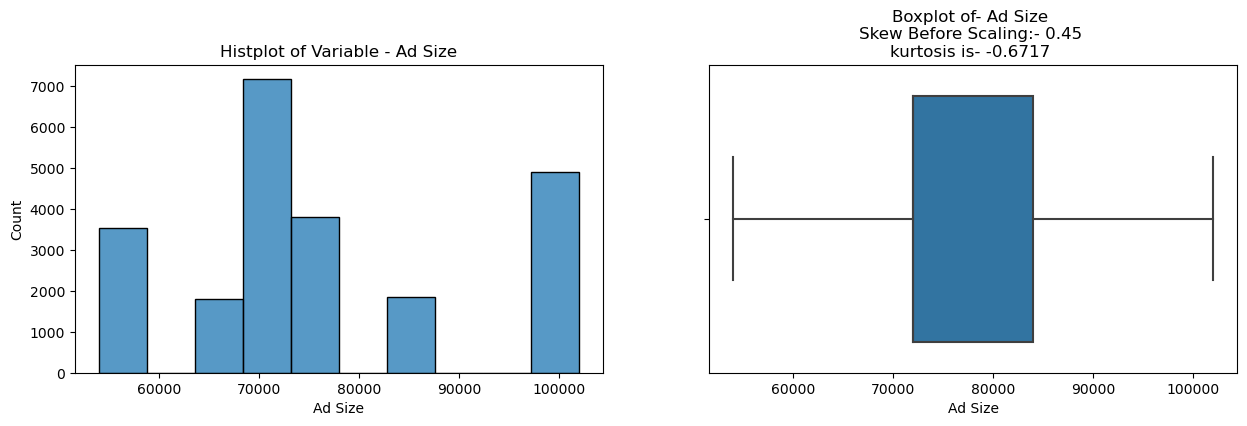

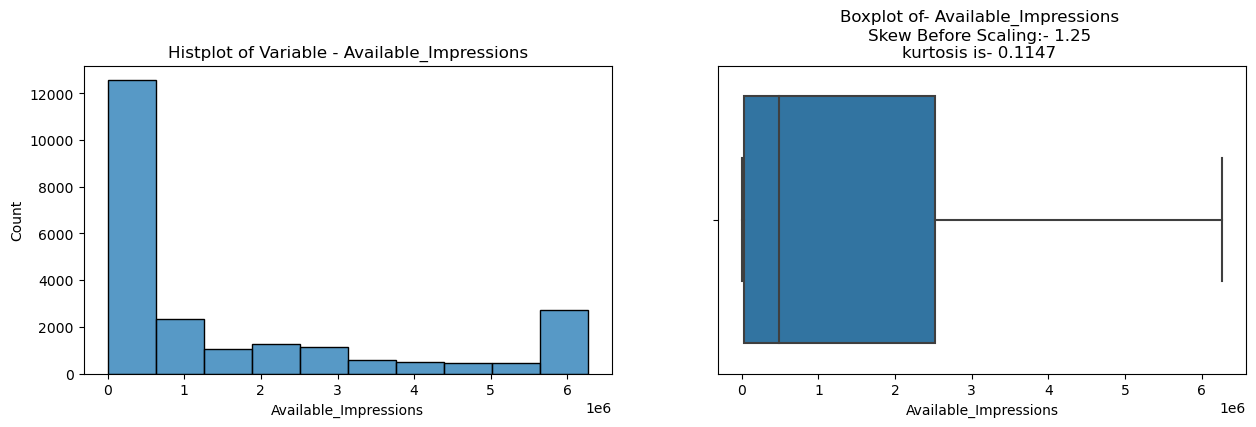

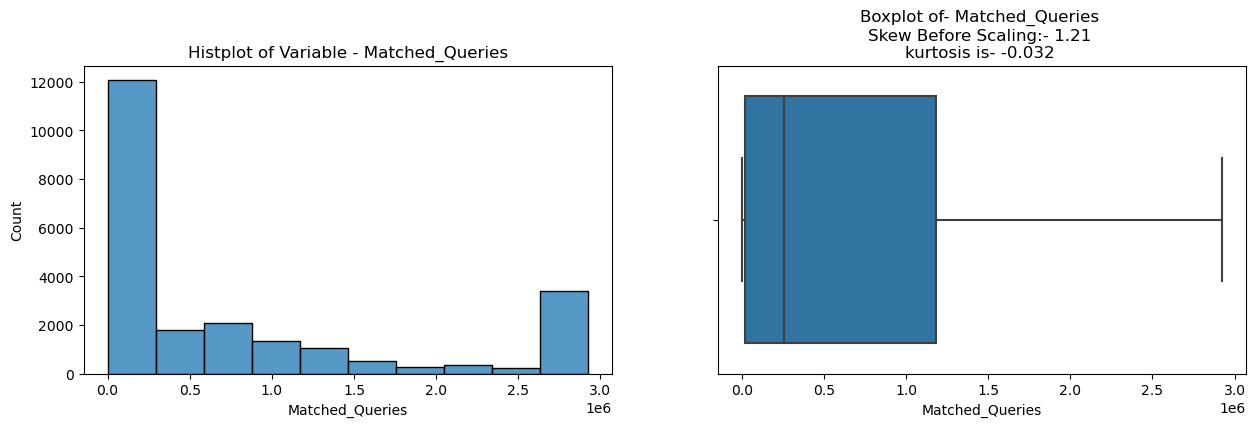

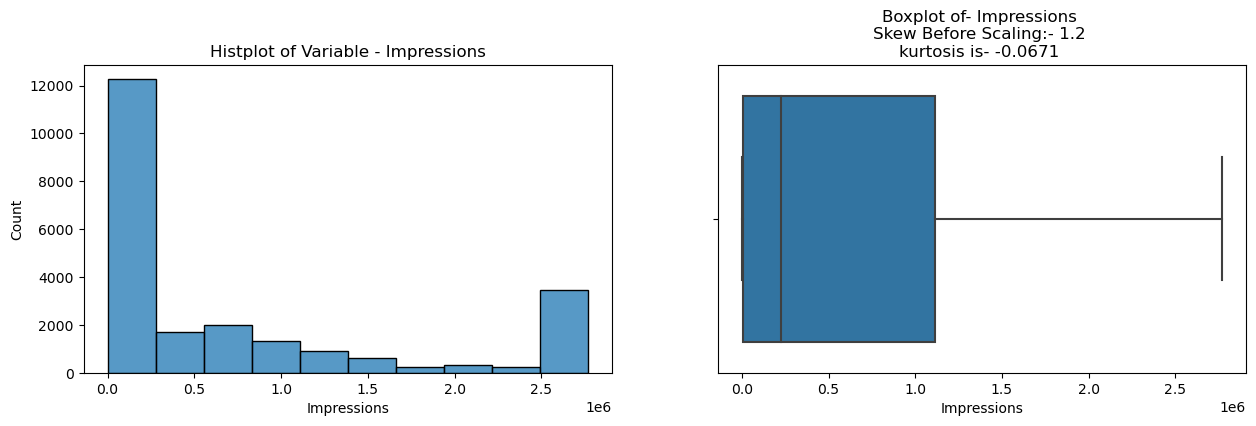

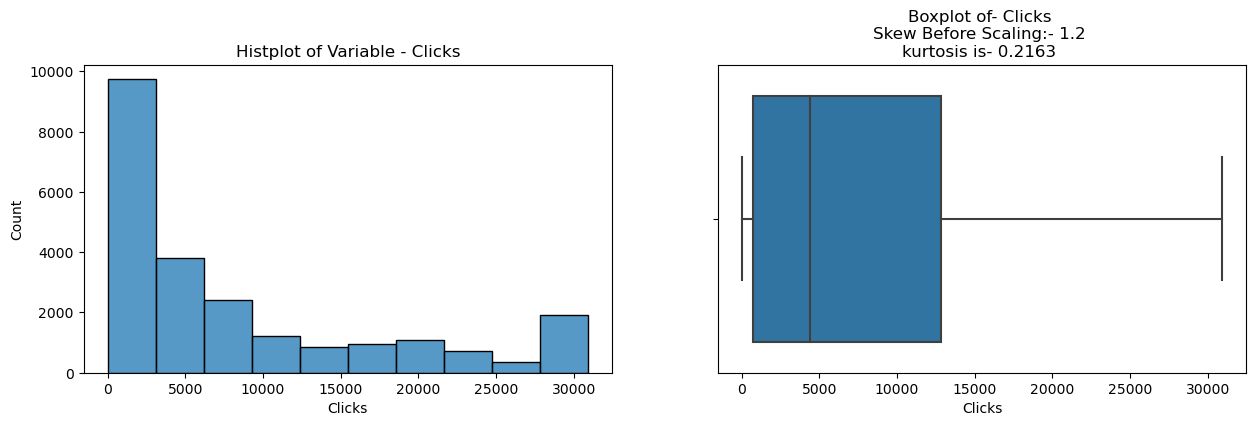

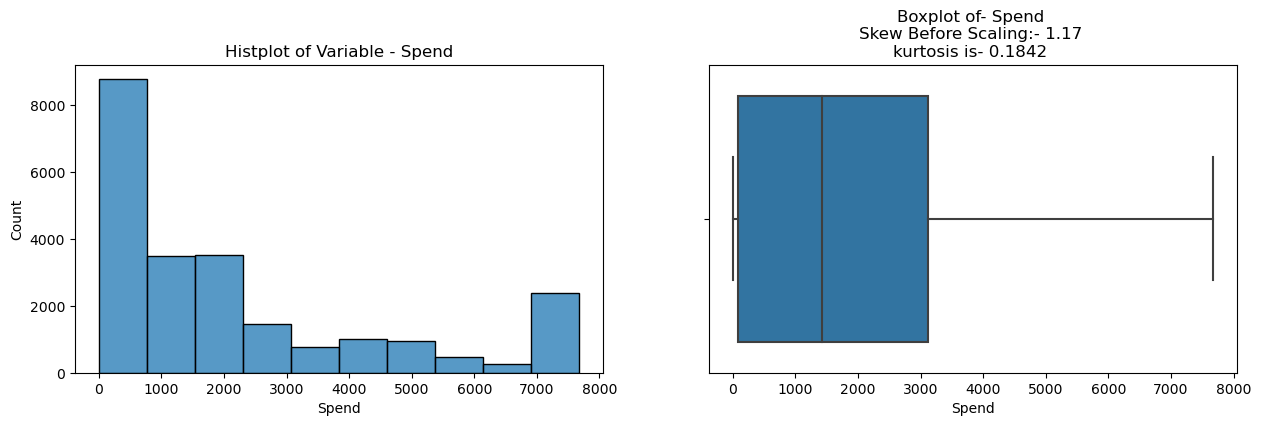

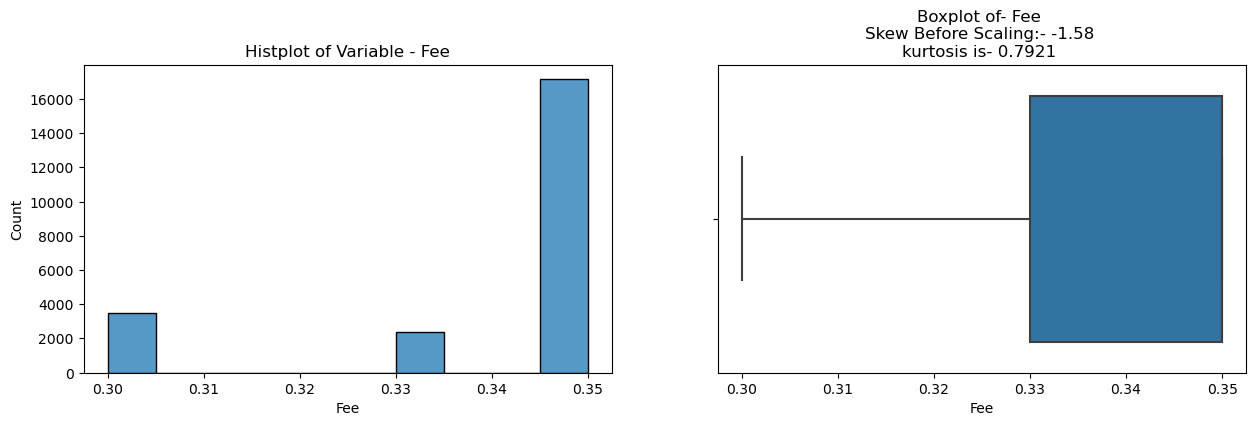

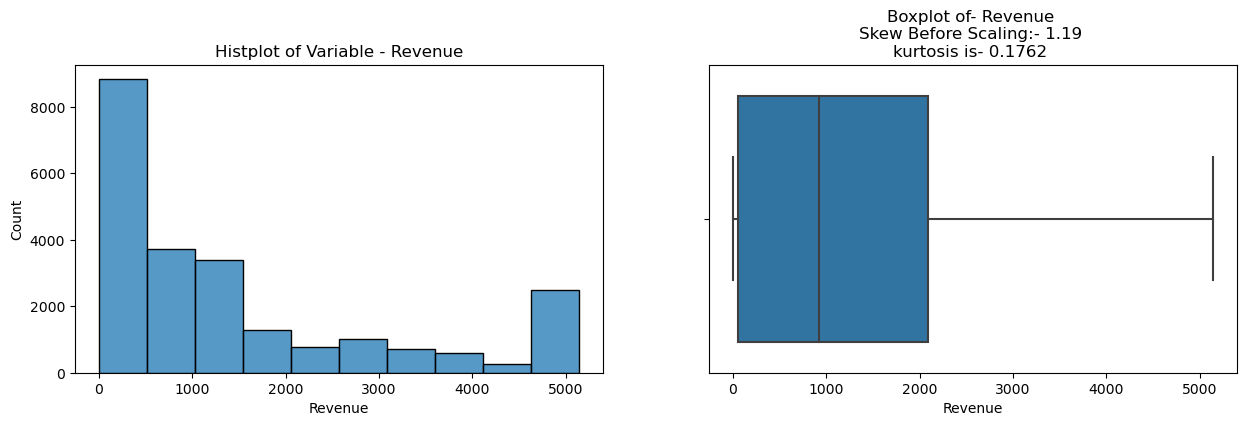

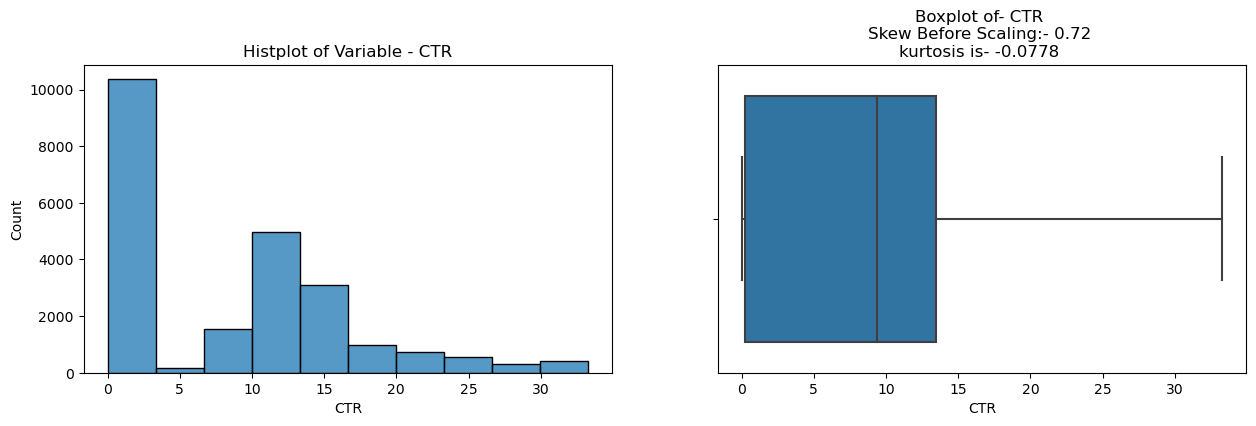

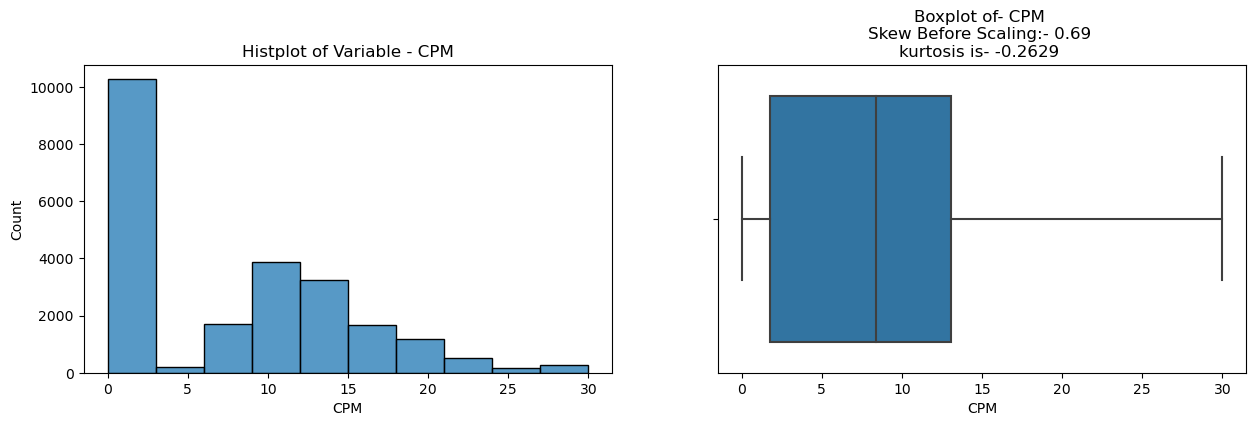

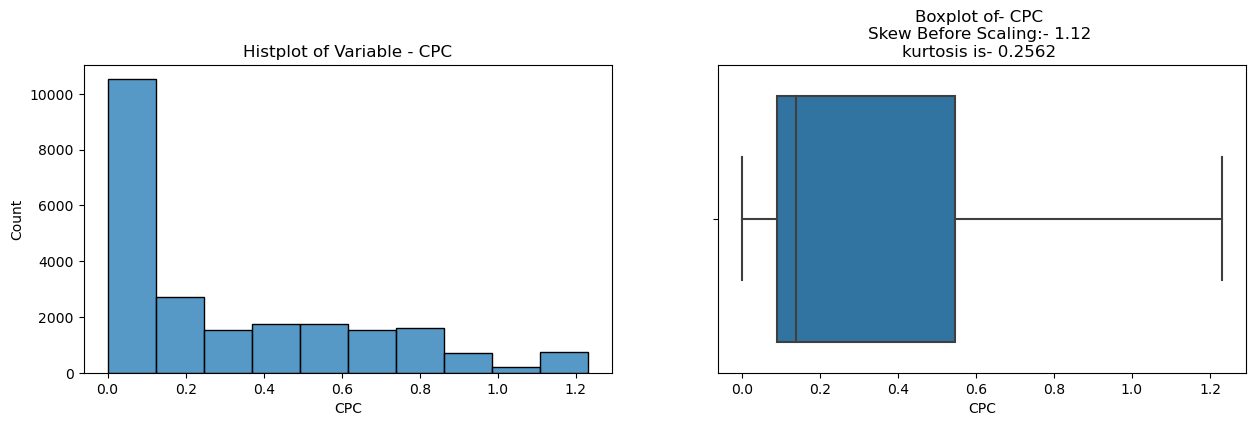

In [26]:
for col in df_ads_data.select_dtypes(include=['float64','int64']).columns:
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    sns.histplot(x=df_ads_data[col], bins=10, ax=ax1)
    ax1.title.set_text(f'Histplot of Variable - {col}')

    sns.boxplot(x=df_ads_data[col], ax = ax2)
    ax2.title.set_text(f'Boxplot of- {col} \nSkew Before Scaling:- {round(df_ads_data[col].skew(),2)} \nkurtosis is- {round(df_ads_data[col].kurtosis(),4)} ')
    plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <font size="3" color = DarkBlue >
        <br> Yes, we have ouliers in the datasets. Treating outlier is very important for K-Clustering. Outliers can affect the calculation of mean, standad deviation, covariance and correlation. As clustering is done by trying to separate samples into K groups of equal variance, outliers can have a significant impact on clustering. Hence it is better to identify and remove outliers before applying clustering.
        <ul>
            <font size="3" color = DarkBlue >
            <li>InventoryType, Ad Type, Platform, Device Type and Format are categorical variables and outlier treatment for such columns is not needed</li>
            <li>Ad - Length, Ad- Width, Ad Size, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM and CPC has Skewness and outliers as we can see in the boxplot above.</li>
            <li>Created a function to get the lower and upper range of outliers. And then it was applied on Variables to update the values based on following criteria</li>
                <ul> 
                <li>If the Values of the variable is more than maximum value (Q3 + 1.5 times IQR) then the value is updated to 75th percentile value.</li>
                <li>If the Values of the variable is less than minimum value (Q1 - 1.5 times IQR) then the value is updated to 25th percentile value.</li>
            <li>Boxplot is drawn to observe if we still have any active outliers. We do not observe any outliers after the outlier treatment.</li>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.4 Perform z-score scaling and discuss how it affects the speed of the algorithm.
            </span>   
        </font>    
</h3>

#### Find the columns in tha dataset that needs to be removed

In [27]:
df_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  float64
 3   Ad- Width              23066 non-null  float64
 4   Ad Size                23066 non-null  float64
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  float64
 10  Matched_Queries        23066 non-null  float64
 11  Impressions            23066 non-null  float64
 12  Clicks                 23066 non-null  float64
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [28]:
df_ads_data['InventoryType'].unique()

array(['Format1', 'Format6', 'Format5', 'Format7', 'Format4', 'Format3',
       'Format2'], dtype=object)

In [29]:
df_ads_data['Ad - Length'].unique()

array([300., 336., 720., 120., 480., 728.])

In [30]:
df_ads_data['Ad Size'].unique()

array([ 75000.,  84000., 102000.,  72000.,  54000.,  65520.])

In [31]:
df_ads_data['Ad Type'].unique()

array(['Inter222', 'Inter227', 'Inter228', 'Inter217', 'Inter219',
       'Inter221', 'Inter223', 'Inter225', 'Inter229', 'Inter224',
       'inter230', 'Inter226', 'Inter220', 'Inter218'], dtype=object)

In [32]:
df_ads_data['Platform'].unique()

array(['Video', 'App', 'Web'], dtype=object)

In [33]:
df_ads_data['Device Type'].unique()

array(['Desktop', 'Mobile'], dtype=object)

In [34]:
df_ads_data['Format'].unique()

array(['Display', 'Video'], dtype=object)

In [35]:
df_ads_data['Fee'].unique()

array([0.35, 0.33, 0.3 ])

In [36]:
df_ads_data_new = df_ads_data.copy()

In [37]:
s="Hello$@ Python3$"
import re
# s1=re.sub("[^A-Za-z]","",s)
s1=re.sub("[^0-9]","",s)
print (s1)

3


In [38]:
pattern = '[A-Za-z](\d+)'
df_ads_data['InventoryType']=df_ads_data['InventoryType'].str.extract(pattern)
df_ads_data['Ad Type']=df_ads_data['Ad Type'].str.extract(pattern)
df_ads_data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,1,300.00,250.00,75000.00,222,Video,Desktop,Display,1806.00,325.00,323.00,1.00,0.00,0.35,0.00,0.31,0.00,0.00
1,2020-9-2-10,1,300.00,250.00,75000.00,227,App,Mobile,Video,1780.00,285.00,285.00,1.00,0.00,0.35,0.00,0.35,0.00,0.00
2,2020-9-1-22,1,300.00,250.00,75000.00,222,Video,Desktop,Display,2727.00,356.00,355.00,1.00,0.00,0.35,0.00,0.28,0.00,0.00
3,2020-9-3-20,1,300.00,250.00,75000.00,228,Video,Mobile,Video,2430.00,497.00,495.00,1.00,0.00,0.35,0.00,0.20,0.00,0.00
4,2020-9-4-15,1,300.00,250.00,75000.00,217,Web,Desktop,Video,1218.00,242.00,242.00,1.00,0.00,0.35,0.00,0.41,0.00,0.00


In [39]:
df_ads_data['Device Type']= np.where(df_ads_data['Device Type']=='Desktop',1,2) 
df_ads_data['Format']=np.where(df_ads_data['Format']=='Display',1,2)
df_ads_data['Platform']=np.where(df_ads_data['Platform']=='Video',1,df_ads_data['Platform'])
df_ads_data['Platform']=np.where(df_ads_data['Platform']=='App',2,df_ads_data['Platform'])
df_ads_data['Platform']=np.where(df_ads_data['Platform']=='Web',3,df_ads_data['Platform'])
df_ads_data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,1,300.00,250.00,75000.00,222,1,1,1,1806.00,325.00,323.00,1.00,0.00,0.35,0.00,0.31,0.00,0.00
1,2020-9-2-10,1,300.00,250.00,75000.00,227,2,2,2,1780.00,285.00,285.00,1.00,0.00,0.35,0.00,0.35,0.00,0.00
2,2020-9-1-22,1,300.00,250.00,75000.00,222,1,1,1,2727.00,356.00,355.00,1.00,0.00,0.35,0.00,0.28,0.00,0.00
3,2020-9-3-20,1,300.00,250.00,75000.00,228,1,2,2,2430.00,497.00,495.00,1.00,0.00,0.35,0.00,0.20,0.00,0.00
4,2020-9-4-15,1,300.00,250.00,75000.00,217,3,1,2,1218.00,242.00,242.00,1.00,0.00,0.35,0.00,0.41,0.00,0.00


In [40]:
df_ads_data['Platform'] =df_ads_data['Platform'].astype(int)
df_ads_data['Format'] =df_ads_data['Format'].astype(int)
df_ads_data['Device Type'] =df_ads_data['Device Type'].astype(int)
df_ads_data['InventoryType'] =df_ads_data['InventoryType'].astype(int)
df_ads_data['Ad Type'] =df_ads_data['Ad Type'].astype(int)

In [41]:
df_ads_data['InventoryType'].unique()

array([1, 6, 5, 7, 4, 3, 2])

In [42]:
df_ads_data['Ad Type'].unique()

array([222, 227, 228, 217, 219, 221, 223, 225, 229, 224, 230, 226, 220,
       218])

In [43]:
df_ads_data['Format'].unique()

array([1, 2])

In [44]:
df_ads_data['Device Type'].unique()

array([1, 2])

In [45]:
df_ads_data['Platform'].unique()

array([1, 2, 3])

In [46]:
df_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  int32  
 2   Ad - Length            23066 non-null  float64
 3   Ad- Width              23066 non-null  float64
 4   Ad Size                23066 non-null  float64
 5   Ad Type                23066 non-null  int32  
 6   Platform               23066 non-null  int32  
 7   Device Type            23066 non-null  int32  
 8   Format                 23066 non-null  int32  
 9   Available_Impressions  23066 non-null  float64
 10  Matched_Queries        23066 non-null  float64
 11  Impressions            23066 non-null  float64
 12  Clicks                 23066 non-null  float64
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

#### Dropping the column - Timestamp

In [47]:
df_ads_data.iloc[:, 1:19] 

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,1,300.00,250.00,75000.00,222,1,1,1,1806.00,325.00,323.00,1.00,0.00,0.35,0.00,0.31,0.00,0.00
1,1,300.00,250.00,75000.00,227,2,2,2,1780.00,285.00,285.00,1.00,0.00,0.35,0.00,0.35,0.00,0.00
2,1,300.00,250.00,75000.00,222,1,1,1,2727.00,356.00,355.00,1.00,0.00,0.35,0.00,0.28,0.00,0.00
3,1,300.00,250.00,75000.00,228,1,2,2,2430.00,497.00,495.00,1.00,0.00,0.35,0.00,0.20,0.00,0.00
4,1,300.00,250.00,75000.00,217,3,1,2,1218.00,242.00,242.00,1.00,0.00,0.35,0.00,0.41,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,5,720.00,300.00,102000.00,220,3,2,2,1.00,1.00,1.00,1.00,0.07,0.35,0.05,33.28,29.98,0.07
23062,5,720.00,300.00,102000.00,224,3,1,2,3.00,2.00,2.00,1.00,0.04,0.35,0.03,33.28,20.00,0.04
23063,5,720.00,300.00,102000.00,218,2,2,2,2.00,1.00,1.00,1.00,0.05,0.35,0.03,33.28,29.98,0.05
23064,4,120.00,600.00,72000.00,230,1,2,2,7.00,1.00,1.00,1.00,0.07,0.35,0.05,33.28,29.98,0.07


In [48]:
df_ads_data.iloc[:, 1:19].columns.values

array(['InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size', 'Ad Type',
       'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
       'Revenue', 'CTR', 'CPM', 'CPC'], dtype=object)

In [49]:
X = StandardScaler()
df_ads_data_scaled = pd.DataFrame(X.fit_transform(df_ads_data.iloc[:, 1:19]), columns=df_ads_data.iloc[:, 1:19].columns.values)
df_ads_data_scaled

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
1,-1.64,-0.36,-0.43,-0.10,0.87,0.08,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04
2,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.75,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
3,-1.64,-0.36,-0.43,-0.10,1.12,-1.05,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.97,-1.19,-1.04
4,-1.64,-0.36,-0.43,-0.10,-1.61,1.21,-1.34,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,0.86,1.43,-0.19,1.65,-0.87,1.21,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,3.04,3.16,-0.82
23062,0.86,1.43,-0.19,1.65,0.13,1.21,-1.34,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,3.04,1.71,-0.92
23063,0.86,1.43,-0.19,1.65,-1.36,0.08,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,3.04,3.16,-0.88
23064,0.23,-1.13,1.29,-0.30,1.61,-1.05,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,3.04,3.16,-0.82


In [50]:
df_ads_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
InventoryType,23066.00,-0.00,1.00,-1.64,-0.39,0.23,0.86,2.10
Ad - Length,23066.00,-0.00,1.00,-1.13,-1.13,-0.36,1.43,1.47
Ad- Width,23066.00,0.00,1.00,-1.32,-0.43,-0.19,1.29,1.29
Ad Size,23066.00,-0.00,1.00,-1.47,-0.30,-0.30,0.48,1.65
Ad Type,23066.00,-0.00,1.00,-1.61,-0.87,-0.12,0.87,1.61
Platform,23066.00,0.00,1.00,-1.05,-1.05,0.08,1.21,1.21
Device Type,23066.00,0.00,1.00,-1.34,-1.34,0.75,0.75,0.75
Format,23066.00,-0.00,1.00,-1.00,-1.00,1.00,1.00,1.00
Available_Impressions,23066.00,-0.00,1.00,-0.76,-0.74,-0.53,0.43,2.19
Matched_Queries,23066.00,0.00,1.00,-0.78,-0.76,-0.53,0.37,2.07


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
          <font size="3" color = DarkBlue>
        <br> Treating Categorical values so that it can be scaled and used in the clustering.
              <ul>
              <li> Columns - InventoryType, Ad Type, Platform, Device Type and Format are categorical variables with dtype as object. These fields have been updated to a numeric values and dtype has been chnaged to integer so that the variables can be used for Clustering </li>
                <ul>
                    <li>Values in InventoryType has been updated from Format1 to 1, Format2 to 2 and so on..</li>
                    <li>Values in Ad Type has been updated from Inter222 to 222 , Inter223 to 223 and so on..</li>
                    <li>Values in Platform has been updated from Video to 1, App to 2, and Web to 3.</li>
                    <li>Values in Format has been updated from Display to 1 and Video to 2</li>
                    <li>Values in Platform has been updated from Desktop to 1 and Mobile to 2</li>
                 </ul>
              </ul>
           <font size="3" color = Green>
        <br> How does z-score affects the speed of the algorithm ?
        <ul>
            <li>The data are scaled to a variance of 1 after the mean is reduced to 0 via StandardScaler.</li>
            <li>Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.</li>
            <li>If features are on a similar scale, it benefits optimization by making clustering or algorithm speed faster</li>
        </ul>
         <font size="3" color = DarkBlue >
        <b>Scaling: </b>
        <ul>
          <font size="3" color = DarkBlue >
            <li>Before performing Z-Score Scaling using Standard Scaler, we will make sure that only the columns that is needed to be scaled are available in the datasets.</li>
            <li>We observed that column named - Timestamp is not needed for scaling. Hence removed the column from the dataset</li>
            <li>Scaled the data with StandardScaler from sklean library and the output is transformed to Dataframe and stored in another variable</li>
            </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.5 Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.
            </span>   
        </font>    
</h3>

In [51]:
df_ads_data_scaled.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
1,-1.64,-0.36,-0.43,-0.10,0.87,0.08,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04
2,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.75,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
3,-1.64,-0.36,-0.43,-0.10,1.12,-1.05,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.97,-1.19,-1.04
4,-1.64,-0.36,-0.43,-0.10,-1.61,1.21,-1.34,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04


### Choosing ward linkage method

In [52]:
wardlink = linkage(df_ads_data_scaled.iloc[:,0:19], method = 'ward', metric='euclidean')

In [53]:
# dend = dendrogram(wardlink)

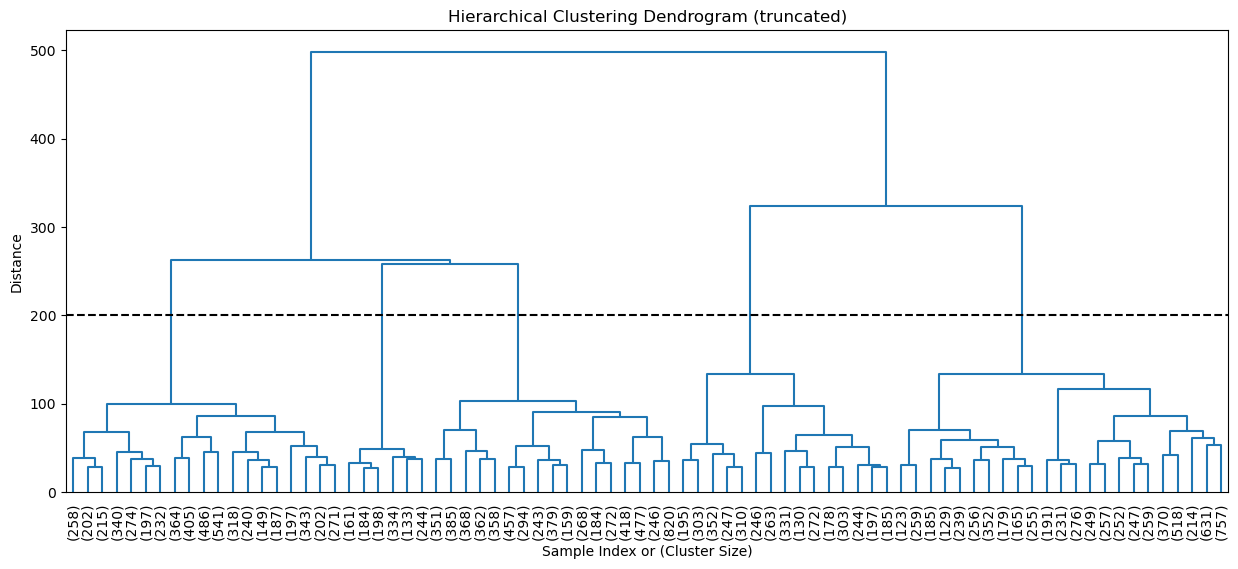

In [54]:
plt.figure(figsize=(15, 6))
wardlink = linkage(df_ads_data_scaled.iloc[:,0:19], method = 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
dendrogram(
    wardlink,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=10 
)
plt.axhline(200, color='black', linestyle='--')
plt.show()

#### Importing fcluster module to create clusters

In [55]:
# Set criterion as distance,then create 5 clusters, and store the result in another object 'clusters'
clusters = fcluster(wardlink, 200, criterion='distance')
clusters

array([5, 5, 5, ..., 1, 3, 1], dtype=int32)

In [56]:
df_ads_data_hierarchy = df_ads_data_new.drop('Timestamp',axis=1).copy()
df_ads_data_hierarchy['Clusters'] = clusters

In [57]:
df_ads_data_hierarchy.head(5)

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters
0,Format1,300.00,250.00,75000.00,Inter222,Video,Desktop,Display,1806.00,325.00,323.00,1.00,0.00,0.35,0.00,0.31,0.00,0.00,5
1,Format1,300.00,250.00,75000.00,Inter227,App,Mobile,Video,1780.00,285.00,285.00,1.00,0.00,0.35,0.00,0.35,0.00,0.00,5
2,Format1,300.00,250.00,75000.00,Inter222,Video,Desktop,Display,2727.00,356.00,355.00,1.00,0.00,0.35,0.00,0.28,0.00,0.00,5
3,Format1,300.00,250.00,75000.00,Inter228,Video,Mobile,Video,2430.00,497.00,495.00,1.00,0.00,0.35,0.00,0.20,0.00,0.00,5
4,Format1,300.00,250.00,75000.00,Inter217,Web,Desktop,Video,1218.00,242.00,242.00,1.00,0.00,0.35,0.00,0.41,0.00,0.00,5


In [58]:
df_ads_data_hierarchy.Clusters.value_counts().sort_index()

1    5421
2    1254
3    6041
4    3756
5    6594
Name: Clusters, dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Created a wardlink using linkage from scipy.cluster.hierarchy library </li>
            <li>We made use of ward method for creating wardlink</li>
            <li>By default, wardlink makes use of 'euclidean' metrics to calculate the distance between the points</li>
            <li>We also created dendrogram diagram using dendrogram from scipy.cluster.hierarchy library</li>
            <li>Dendogram is a tree-structured graph used to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure</li>
            <li>We set criterion as distance. And created 5 cluster using fcluster from scipy.cluster.hierarchy library</li>
            <li>We could observe from the DataFrame that each records of dataset were grouped in 5 clusters </li>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.6 Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.
            </span>   
        </font>    
</h3>

In [59]:
df_ads_data_scaled.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
1,-1.64,-0.36,-0.43,-0.10,0.87,0.08,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04
2,-1.64,-0.36,-0.43,-0.10,-0.37,-1.05,-1.34,-1.00,-0.75,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.96,-1.19,-1.04
3,-1.64,-0.36,-0.43,-0.10,1.12,-1.05,0.75,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.97,-1.19,-1.04
4,-1.64,-0.36,-0.43,-0.10,-1.61,1.21,-1.34,1.00,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-0.95,-1.19,-1.04


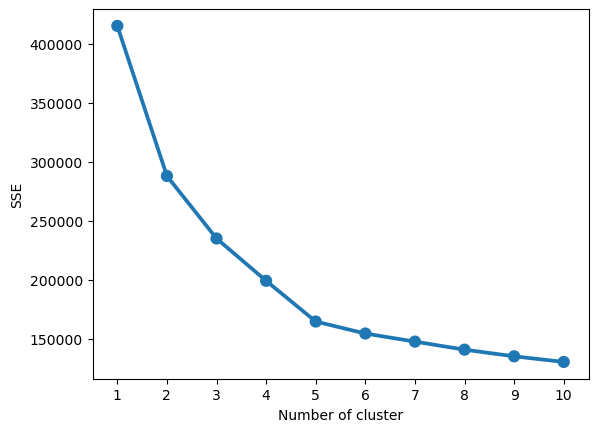

In [60]:
#Empty dictionary to store the SSE (sum of the squared Euclidean distances) for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(df_ads_data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [61]:
sse 

{1: 415187.99999999977,
 2: 288006.3706452577,
 3: 235044.5548511261,
 4: 199189.3851895532,
 5: 164663.2378876495,
 6: 154495.13711333327,
 7: 147645.59672413778,
 8: 140823.37200094812,
 9: 135174.52555306966,
 10: 130430.48738941274}

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>We used scaled dataset to perform KMeans Clustering upto n=10 using KMeans from sklearn.cluster </li>
            <li>We extracted SSE (sum of the squared Euclidean distances) from KMeans algorithm and stored in a dictionary where Key is a sequence from 1 to 10 and Value is SSE.</li>
            <li>Plotted the SSE key and values using pointplot from seaborn library.</li>
            <li>From the plot, we could see that slight Elbow Point is getting formed for no of clusters 2 and 5.</li>
            <li>Need to confirm the best number of cluster with silhoutte scores, before we profile the clusters with respect to the means of each variable in the dataset </li>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.7 Print silhouette scores for up to 10 clusters and identify optimum number of clusters.
            </span>   
        </font>    
</h3>

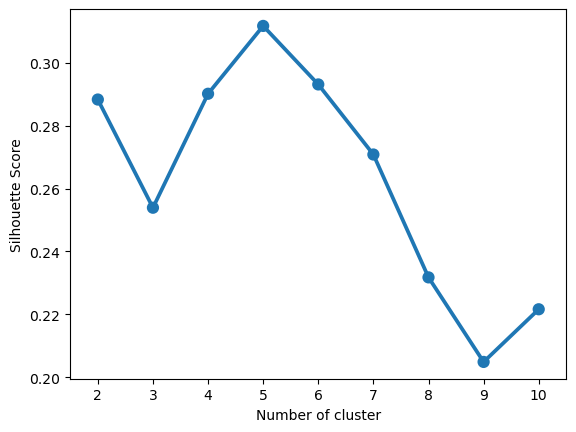

In [62]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(df_ads_data_scaled)
    labels = kmeans.predict(df_ads_data_scaled)
    sc[k] = silhouette_score(df_ads_data_scaled, labels)

#Elbow plot
plt.figure()
sns.pointplot(x=list(sc.keys()), y=list(sc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [63]:
sc

{2: 0.28835549373005726,
 3: 0.25392238982027476,
 4: 0.29019096350607626,
 5: 0.3117805652625308,
 6: 0.29315753503441666,
 7: 0.2708561214626986,
 8: 0.23175529354994018,
 9: 0.20484785040379838,
 10: 0.22160576811032798}

#### KMeans for k=5 and
#### Cluster evaluation for n=5 clusters: the silhouette score

In [64]:
k_means = KMeans(n_clusters = 5,random_state=123)
k_means.fit(df_ads_data_scaled)
labels = k_means.labels_
silhouette_score(df_ads_data_scaled,labels,random_state=123)

0.3117805652625308

In [65]:
labels

array([4, 4, 4, ..., 2, 0, 2])

#### silhouette score is better for 5 clusters than for 2 clusters. So, final clusters will be 5

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>We used silhouette score to verify the optimal number of clusters as 5.</li>
            <li>When KMeans K=2, the silhouette score was found to be 0.28835549373005726</li>
            <li>When KMeans K=4, the silhouette score was found to be 0.29019096350607626</li>
            <li>When KMeans K=6, the silhouette score was found to be 0.29315753503441666</li>
            <li>When KMeans K=5, the silhouette score was found to be 0.3117805652625308</li>
            <li>So, we can confirm that final number of optimum clusters is 5.
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = Blue >
            <span style='font-family:Georgia'>
            1.8 Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots]
            </span>   
        </font>    
</h3>

In [66]:
df_ads_data_kmeanscluster=df_ads_data_new.copy()
df_ads_data_kmeanscluster.drop('Timestamp',axis=1,inplace=True)
df_ads_data_kmeanscluster["Clus_kmeans5"]=labels
df_ads_data_kmeanscluster.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,Format1,300.00,250.00,75000.00,Inter222,Video,Desktop,Display,1806.00,325.00,323.00,1.00,0.00,0.35,0.00,0.31,0.00,0.00,4
1,Format1,300.00,250.00,75000.00,Inter227,App,Mobile,Video,1780.00,285.00,285.00,1.00,0.00,0.35,0.00,0.35,0.00,0.00,4
2,Format1,300.00,250.00,75000.00,Inter222,Video,Desktop,Display,2727.00,356.00,355.00,1.00,0.00,0.35,0.00,0.28,0.00,0.00,4
3,Format1,300.00,250.00,75000.00,Inter228,Video,Mobile,Video,2430.00,497.00,495.00,1.00,0.00,0.35,0.00,0.20,0.00,0.00,4
4,Format1,300.00,250.00,75000.00,Inter217,Web,Desktop,Video,1218.00,242.00,242.00,1.00,0.00,0.35,0.00,0.41,0.00,0.00,4


In [67]:
df_ads_data_kmeanscluster[['Device Type','Impressions','Clicks','Spend','Revenue','CTR','CPM','CPC','Clus_kmeans5']]

,Device Type,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,Desktop,323.00,1.00,0.00,0.00,0.31,0.00,0.00,4
1,Mobile,285.00,1.00,0.00,0.00,0.35,0.00,0.00,4
2,Desktop,355.00,1.00,0.00,0.00,0.28,0.00,0.00,4
3,Mobile,495.00,1.00,0.00,0.00,0.20,0.00,0.00,4
4,Desktop,242.00,1.00,0.00,0.00,0.41,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...
23061,Mobile,1.00,1.00,0.07,0.05,33.28,29.98,0.07,2
23062,Desktop,2.00,1.00,0.04,0.03,33.28,20.00,0.04,2
23063,Mobile,1.00,1.00,0.05,0.03,33.28,29.98,0.05,2
23064,Mobile,1.00,1.00,0.07,0.05,33.28,29.98,0.07,0


In [68]:
df_ads_data_kmeanscluster[['Device Type','Clus_kmeans5']].value_counts().sort_index()

Device Type  Clus_kmeans5
Desktop      0               2135
             1               1487
             2               1948
             3                553
             4               2137
Mobile       0               3799
             1               2619
             2               3511
             3                973
             4               3904
dtype: int64

In [69]:
df_cluster_profile1 = df_ads_data_kmeanscluster[['Device Type','Impressions','Clicks','Spend','Revenue','CTR','CPM','CPC','Clus_kmeans5']].groupby(['Device Type','Clus_kmeans5']).mean().sort_index()
df_cluster_profile1['Frequency'] = df_ads_data_kmeanscluster[['Device Type','Clus_kmeans5']].value_counts().sort_index().values
df_cluster_profile1.reset_index(inplace=True)
df_cluster_profile1

,Device Type,Clus_kmeans5,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,Frequency
0,Desktop,0,13503.48,2001.84,214.25,139.32,16.24,14.54,0.10,2135
1,Desktop,1,2657695.88,11215.51,5680.72,3839.65,0.22,1.56,0.74,1487
2,Desktop,2,131733.05,12578.77,1149.25,748.51,12.69,11.39,0.11,1948
3,Desktop,3,478137.51,30605.95,6567.91,4485.53,13.79,15.47,0.11,553
4,Desktop,4,809277.33,3248.50,1476.82,961.60,0.41,1.79,0.52,2137
5,Mobile,0,13280.81,1941.30,214.93,139.74,16.14,14.57,0.10,3799
6,Mobile,1,2663650.06,11134.57,5723.08,3866.90,0.22,1.58,0.75,2619
7,Mobile,2,124996.52,12335.66,1138.56,741.63,12.71,11.46,0.11,3511
8,Mobile,3,480214.75,30562.38,6568.94,4488.31,13.73,15.37,0.11,973
9,Mobile,4,824506.58,3252.87,1495.03,973.82,0.40,1.79,0.53,3904


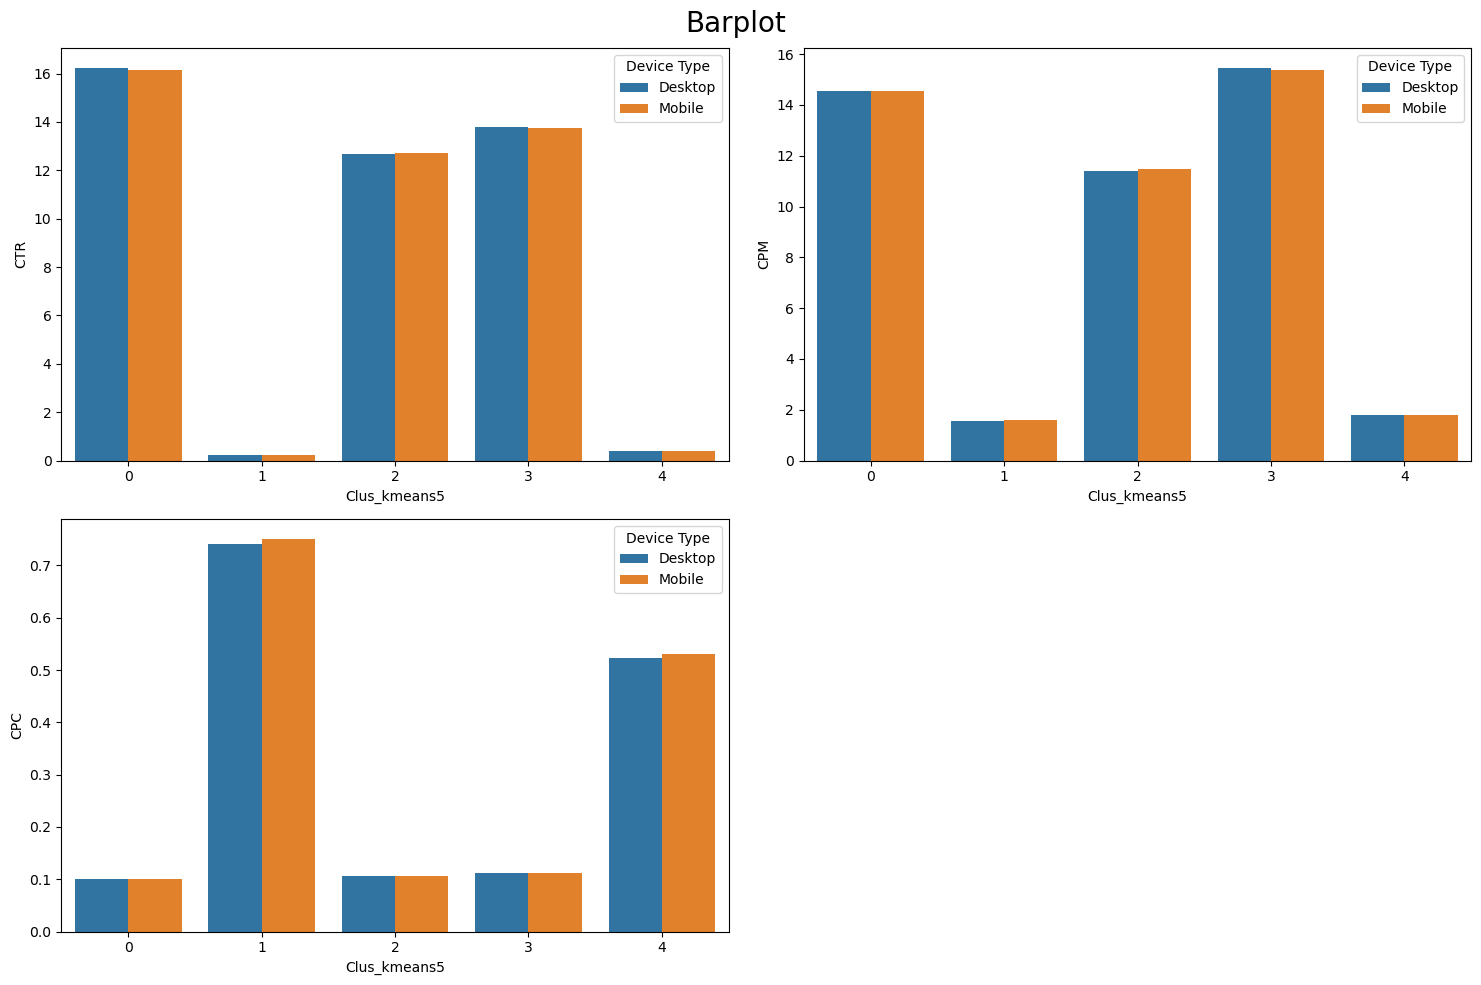

In [70]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.2, bottom = 0.3)
fig.suptitle('Barplot', fontsize=20)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.barplot(data=df_cluster_profile1, y='CTR', x ='Clus_kmeans5', hue='Device Type', ax=ax1);
sns.barplot(data=df_cluster_profile1, y='CPM', x ='Clus_kmeans5', hue='Device Type', ax=ax2);
sns.barplot(data=df_cluster_profile1, y='CPC', x ='Clus_kmeans5', hue='Device Type', ax=ax3);

fig.tight_layout()

In [71]:
df_cluster_profile1.to_excel('ClusterFile.xlsx')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights: </b>
        <br>We created cluster profiles for three Categorical Values and calculated the Mean of Clicks, Spend, Revenue, CTR, CPM, and CPC. We also noted the Frequency of each Cluster for the particular Category
        <br>Category is - Device Type (Desktop and Mobile)</br>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Average of Click Through Rate (CTR), CPM and CPC is nearly same for both Device Type Desktop and Mobiles across each clusters</li>
            <li>Cluster 0, 2, and 3 shows a high CTR value, so it is considered good because adevrtisement is attracting good number of customers. But cluster 1 and 4 shows a very low CTR value i.e., less than 1%. This could be because it has very low Average Clicks but Very high Average Impressions. A low CTR could indicate that we are targeting the wrong audience or that we are not speaking their language persuasively enough to convince them to click.</li>
            <li>Average CPM is very high for cluster 0,2 and 3. But it is lower for cluster 1 and 4. A high CPM score typically means that we are running a capmaign where we have more spends than impressions. It is kind of campaign that needs some improvement to boost the ad views. </li>
            <li>Average CPC is very high for cluster 1 and 4. But it is lower for cluster 0,2, and 3. A high CPC score typically means that we are spending high cost for a click for a capmaign. We need to improve either by spending less and maintaining the number of clicks or by increasing the no of clicks for the campaign by targetting the right audience.</li>
           </ul>
    </span>    
</div>